<a href="https://colab.research.google.com/github/montassar-ML/project/blob/main/Student_Evaluation_Analysis_(_Clustering_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dataset Information:**
This data set contains a total 5820 evaluation scores provided by students from Gazi University in Ankara (Turkey). There is a total of 28 course specific questions and additional 5 attributes.

# **Attribute Information:**
instr: Instructor's identifier; values taken from {1,2,3}
class: Course code (descriptor); values taken from {1-13}
repeat: Number of times the student is taking this course; values taken from {0,1,2,3,...}
attendance: Code of the level of attendance; values from {0, 1, 2, 3, 4}
difficulty: Level of difficulty of the course as perceived by the student; values taken from {1,2,3,4,5}
Q1: The semester course content, teaching method and evaluation system were provided at the start.
Q2: The course aims and objectives were clearly stated at the beginning of the period.
Q3: The course was worth the amount of credit assigned to it.
Q4: The course was taught according to the syllabus announced on the first day of class.
Q5: The class discussions, homework assignments, applications and studies were satisfactory.
Q6: The textbook and other courses resources were sufficient and up to date.
Q7: The course allowed field work, applications, laboratory, discussion and other studies.
Q8: The quizzes, assignments, projects and exams contributed to helping the learning.
Q9: I greatly enjoyed the class and was eager to actively participate during the lectures.
Q10: My initial expectations about the course were met at the end of the period or year.
Q11: The course was relevant and beneficial to my professional development.
Q12: The course helped me look at life and the world with a new perspective.
Q13: The Instructor's knowledge was relevant and up to date.
Q14: The Instructor came prepared for classes.
Q15: The Instructor taught in accordance with the announced lesson plan.
Q16: The Instructor was committed to the course and was understandable.
Q17: The Instructor arrived on time for classes.
Q18: The Instructor has a smooth and easy to follow delivery/speech.
Q19: The Instructor made effective use of class hours.
Q20: The Instructor explained the course and was eager to be helpful to students.
Q21: The Instructor demonstrated a positive approach to students.
Q22: The Instructor was open and respectful of the views of students about the course.
Q23: The Instructor encouraged participation in the course.
Q24: The Instructor gave relevant homework assignments/projects, and helped/guided students.
Q25: The Instructor responded to questions about the course inside and outside of the course.
Q26: The Instructor's evaluation system (midterm and final questions, projects, assignments, etc.) effectively measured the course objectives.
Q27: The Instructor provided solutions to exams and discussed them with students.
Q28: The Instructor treated all students in a right and objective manner.
Q1-Q28 are all Likert-type, meaning that the values are taken from {1,2,3,4,5}\

# Import modules

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 99


# Loading the dataset

In [3]:
df = pd.read_csv("turkiye-student-evaluation_generic.csv")
df.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [4]:
# statistical info
df.describe()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.00000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000
mean,2.485567,7.276289,1.214089,1.675601,2.783505,2.929897,3.073883,3.178694,3.082474,3.105842,3.107388,3.066323,3.041924,3.165979,3.090722,3.183849,3.035567,3.242784,3.290893,3.287285,3.169588,3.398454,3.222509,3.261684,3.285395,3.307388,3.317526,3.20189,3.166838,3.312543,3.222165,3.154811,3.308076
std,0.718473,3.688175,0.532376,1.474975,1.348987,1.341077,1.285251,1.253567,1.284594,1.278989,1.280807,1.279097,1.283481,1.268930,1.275309,1.295443,1.305772,1.264201,1.255373,1.253122,1.288015,1.267530,1.279799,1.268442,1.276848,1.269974,1.268358,1.27259,1.275909,1.257286,1.270695,1.291872,1.278709
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.00000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,7.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,10.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000
max,3.000000,13.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


In [5]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   instr       5820 non-null   int64
 1   class       5820 non-null   int64
 2   nb.repeat   5820 non-null   int64
 3   attendance  5820 non-null   int64
 4   difficulty  5820 non-null   int64
 5   Q1          5820 non-null   int64
 6   Q2          5820 non-null   int64
 7   Q3          5820 non-null   int64
 8   Q4          5820 non-null   int64
 9   Q5          5820 non-null   int64
 10  Q6          5820 non-null   int64
 11  Q7          5820 non-null   int64
 12  Q8          5820 non-null   int64
 13  Q9          5820 non-null   int64
 14  Q10         5820 non-null   int64
 15  Q11         5820 non-null   int64
 16  Q12         5820 non-null   int64
 17  Q13         5820 non-null   int64
 18  Q14         5820 non-null   int64
 19  Q15         5820 non-null   int64
 20  Q16         5820 non-null   in

# Preprocessing the dataset

In [12]:
# check for null values
df.isnull().sum()

instr         0
class         0
nb.repeat     0
attendance    0
difficulty    0
Q1            0
Q2            0
Q3            0
Q4            0
Q5            0
Q6            0
Q7            0
Q8            0
Q9            0
Q10           0
Q11           0
Q12           0
Q13           0
Q14           0
Q15           0
Q16           0
Q17           0
Q18           0
Q19           0
Q20           0
Q21           0
Q22           0
Q23           0
Q24           0
Q25           0
Q26           0
Q27           0
Q28           0
dtype: int64

# Exploratory Data Analysis

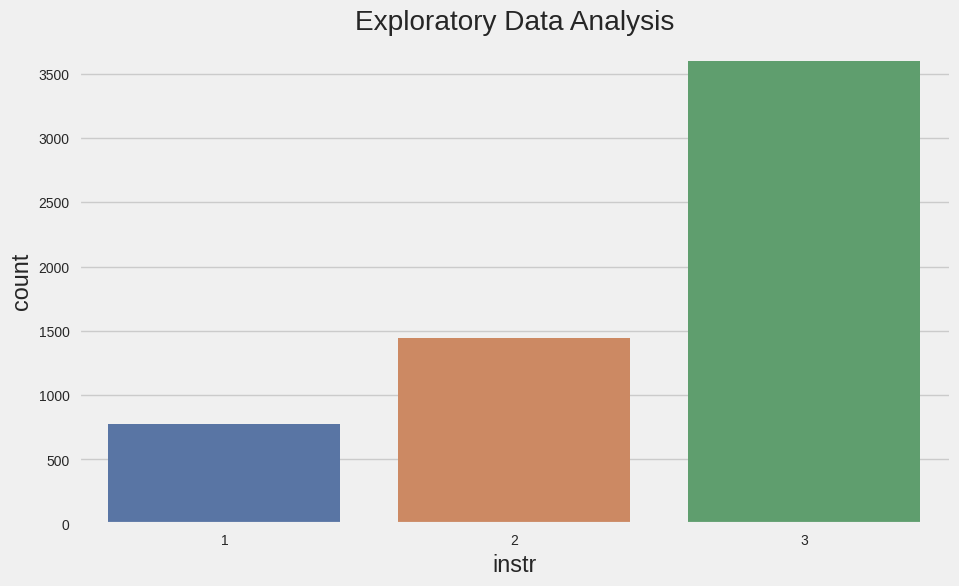

In [13]:
# Set the style
plt.style.use('fivethirtyeight')

# Create the plot
plt.figure(figsize=(10, 6))
sns.countplot(x='instr', data=df, palette='deep')

# Customize the plot
plt.title('Exploratory Data Analysis')
plt.xlabel('instr')
plt.ylabel('count')

# Remove top and right spines
sns.despine()

# Display the plot
plt.show()

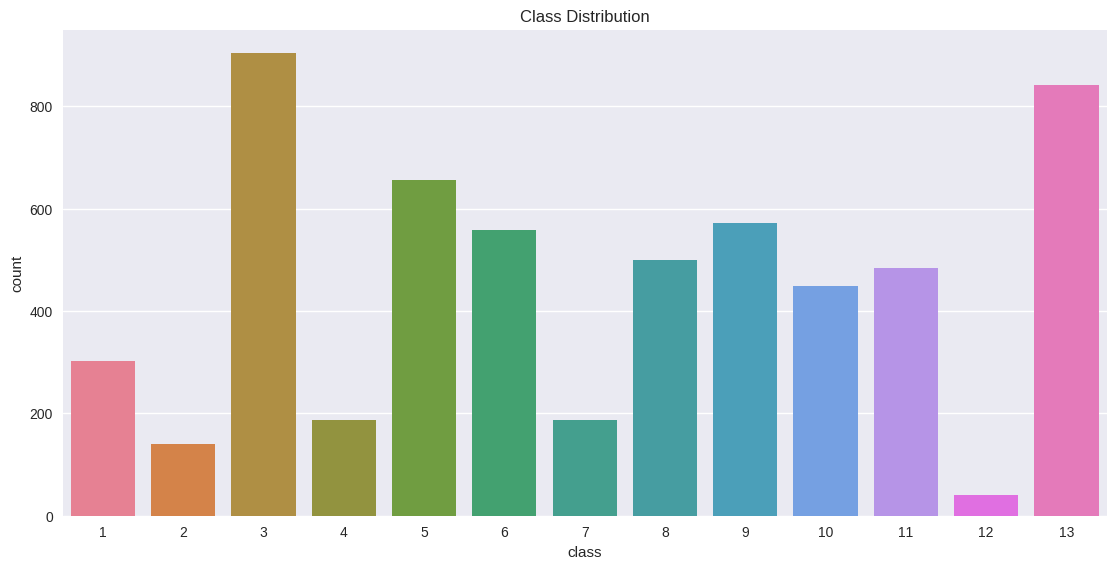

In [14]:
# Assuming you have a DataFrame 'df' with a column 'class'
# If you don't, you can create sample data like this:
# df = pd.DataFrame({'class': range(1, 14)})
# df['count'] = [320, 160, 890, 190, 660, 570, 190, 520, 580, 460, 500, 60, 850]

# Set the style
plt.style.use('seaborn')

# Create the plot
plt.figure(figsize=(12, 6))
sns.countplot(x='class', data=df, order=range(1, 14), palette='husl')

# Customize the plot
plt.title('Class Distribution')
plt.xlabel('class')
plt.ylabel('count')

# Remove top and right spines
sns.despine()

In [15]:
# find mean of questions
x_questions = df.iloc[:, 5:33]
q_mean = x_questions.mean(axis=0)
total_mean = q_mean.mean()

In [16]:
q_mean = q_mean.to_frame('mean')
q_mean.reset_index(level=0, inplace=True)
q_mean.head()

,index,mean
0,Q1,2.929897
1,Q2,3.073883
2,Q3,3.178694
3,Q4,3.082474
4,Q5,3.105842


In [18]:
total_mean

3.1861561119293076

<Axes: xlabel='index', ylabel='mean'>

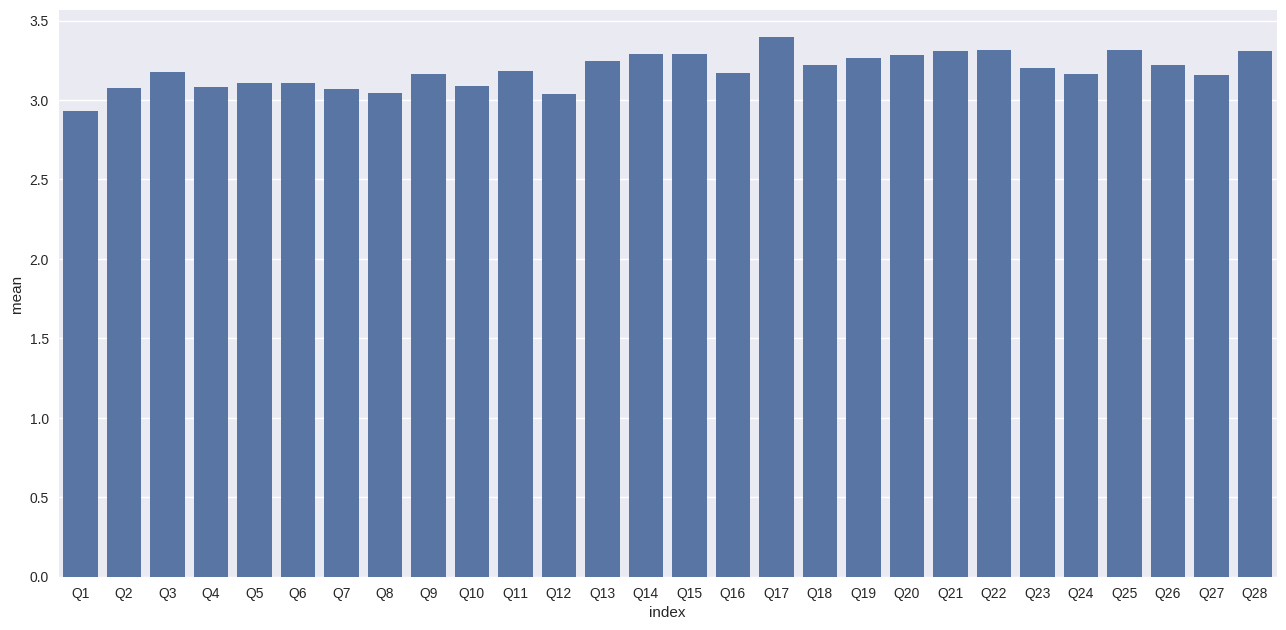

In [21]:
plt.figure(figsize=(14,7))
sns.barplot(x='index', y='mean', data=q_mean)


## Coorelation Matrix

<Axes: >

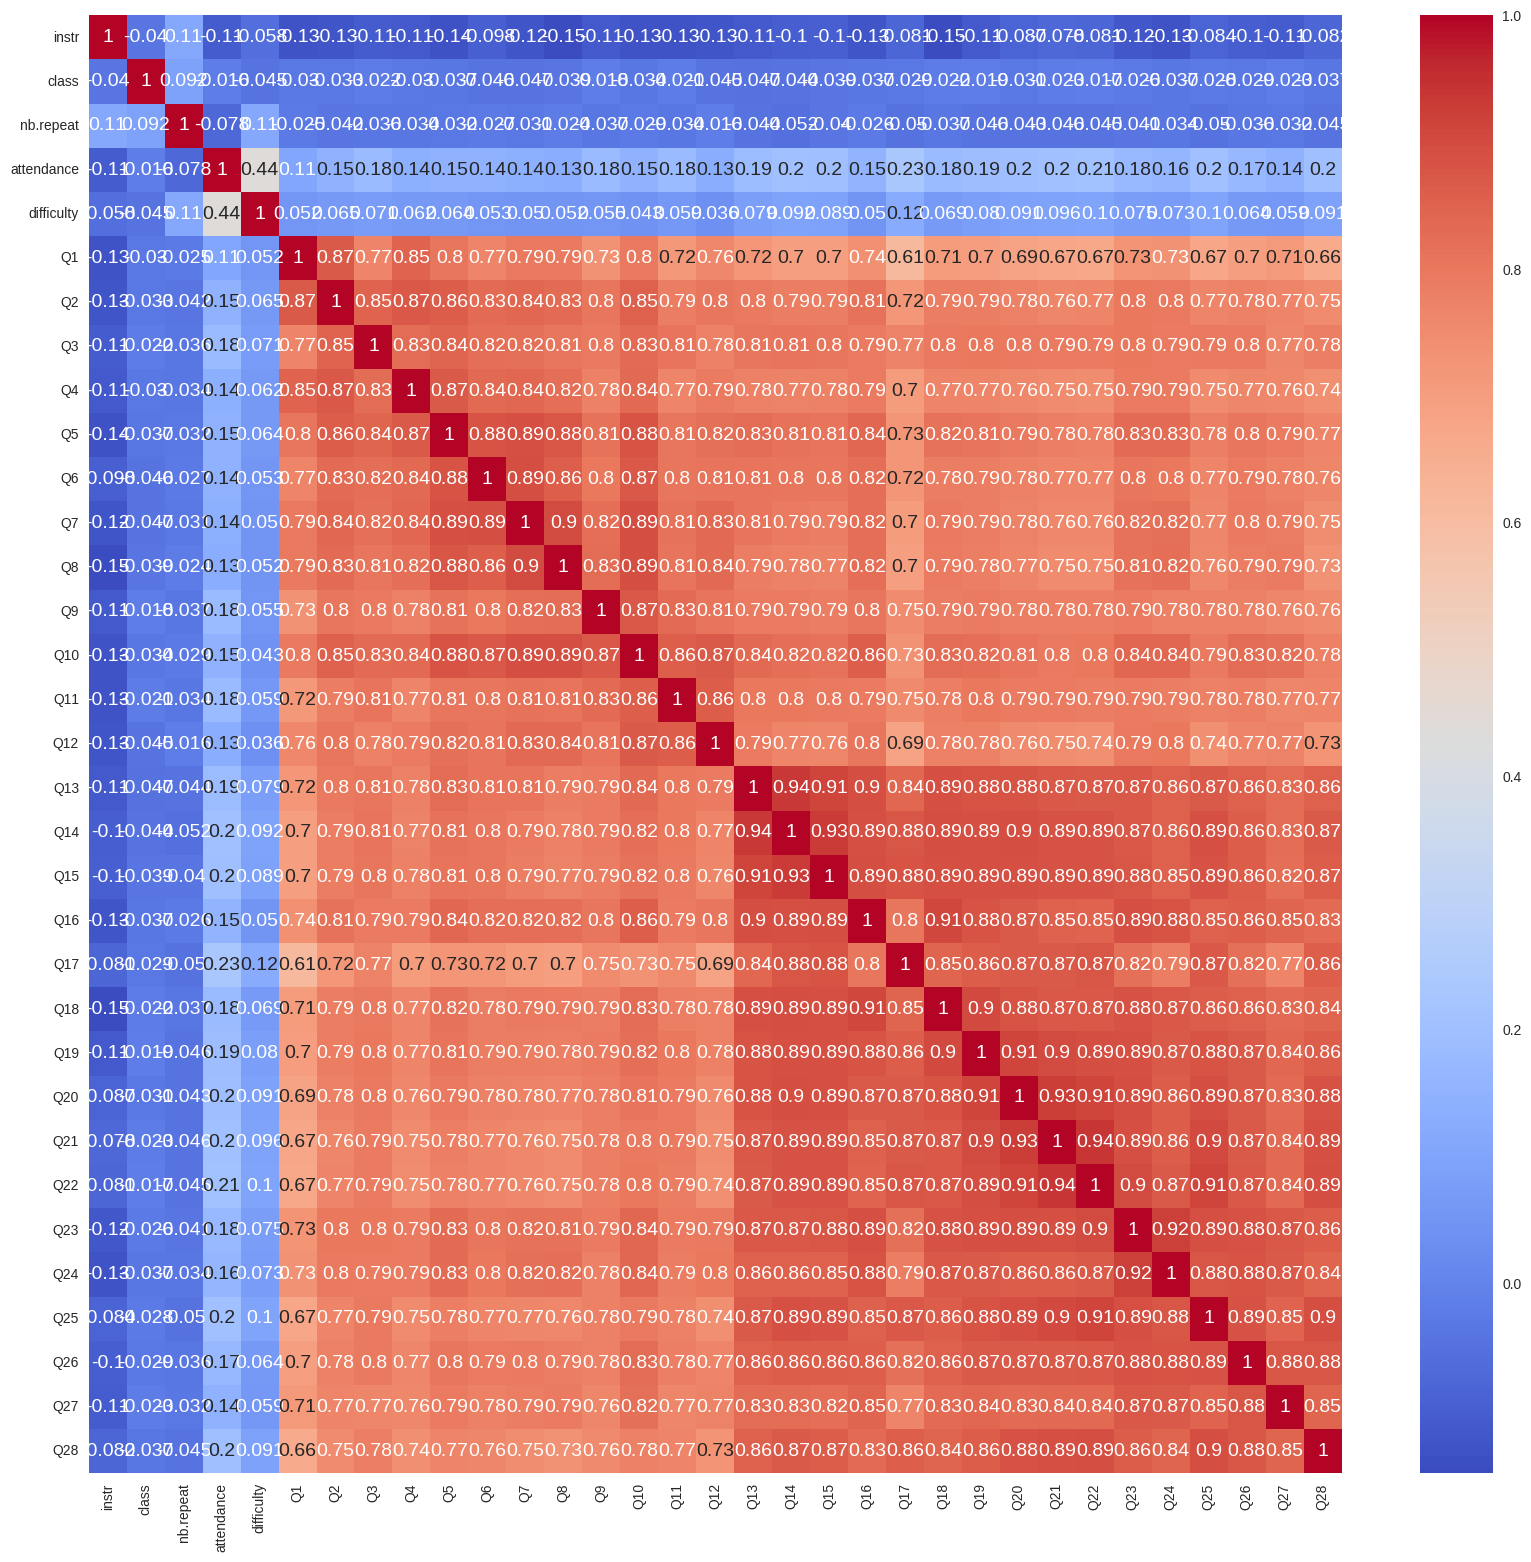

In [22]:
corr = df.corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr, annot=True, cmap='coolwarm')


# Principal component analysis

In [23]:
X = df.iloc[:, 5:33]

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

In [25]:
X_pca

array([[ 0.98901533,  0.52279815],
       [ 0.98901533,  0.52279815],
       [-9.59128851,  0.6408021 ],
       ...,
       [-9.59128851,  0.6408021 ],
       [11.56931918,  0.40479421],
       [11.56931918,  0.40479421]])

In [26]:
# how much info we retained from the dataset
pca.explained_variance_ratio_.cumsum()[1]

0.8671381678891084

# Model Training

In [29]:
# Kmeans clustering
from sklearn.cluster import KMeans
distortions = []
cluster_range = range(1,6)

# elbow method
for i in cluster_range:
    model = KMeans(n_clusters=i, init='k-means++', random_state=42) # Removed n_jobs parameter
    model.fit(X_pca)
    distortions.append(model.inertia_)

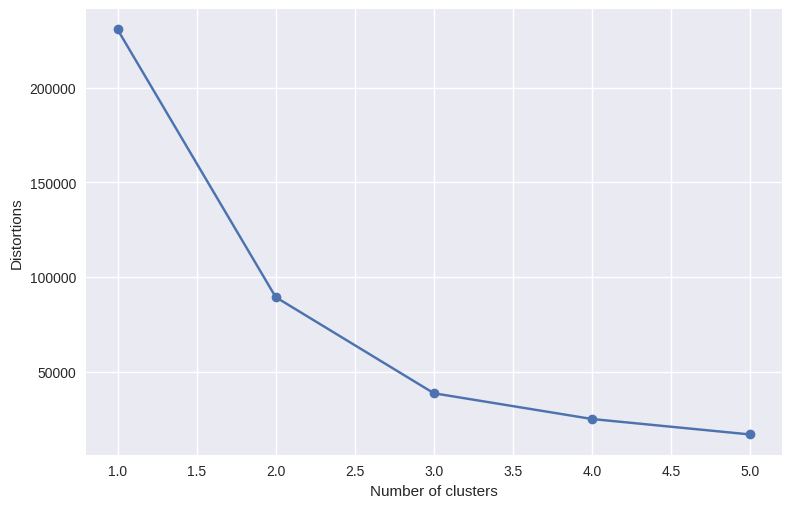

In [30]:
plt.plot(cluster_range, distortions, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel('Distortions')
plt.show()

In [32]:
# use best cluster
model = KMeans(n_clusters=3, init='k-means++', random_state=42) # Removed n_jobs parameter
model.fit(X_pca)
y = model.predict(X_pca)

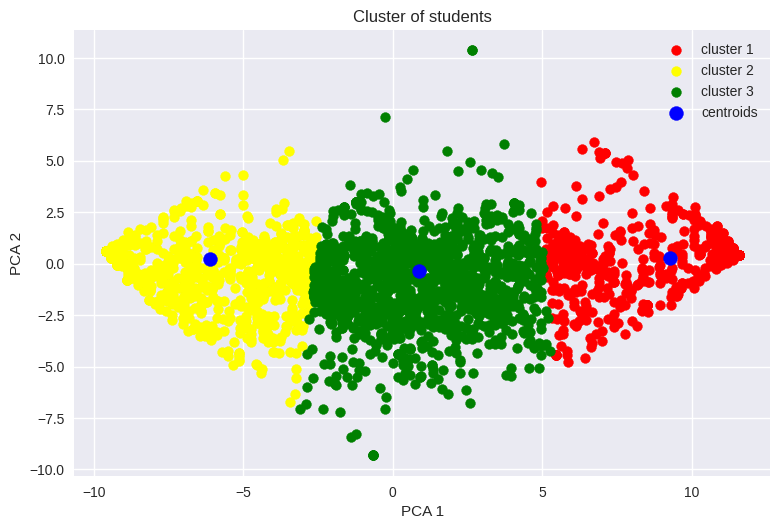

In [33]:
plt.scatter(X_pca[y==0, 0], X_pca[y==0, 1], s=50, c='red', label='cluster 1')
plt.scatter(X_pca[y==1, 0], X_pca[y==1, 1], s=50, c='yellow', label='cluster 2')
plt.scatter(X_pca[y==2, 0], X_pca[y==2, 1], s=50, c='green', label='cluster 3')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:, 1], s=100, c='blue', label='centroids')
plt.title('Cluster of students')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

In [34]:
from collections import Counter
Counter(y)

Counter({2: 2358, 1: 2222, 0: 1240})

In [36]:
model = KMeans(n_clusters=3, init='k-means++', random_state=42) # Removed n_jobs parameter
model.fit(X)
y = model.predict(X)

In [37]:
Counter(y)

Counter({0: 2358, 2: 2223, 1: 1239})

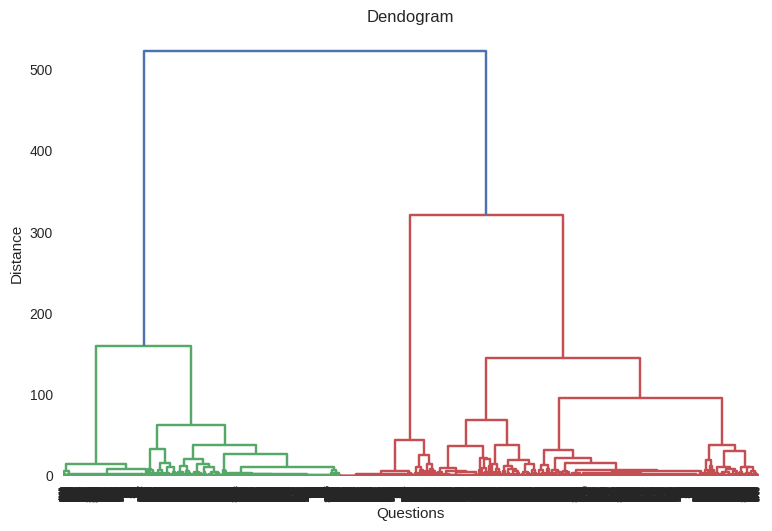

In [38]:
# dendogram
import scipy.cluster.hierarchy as hier
dendogram = hier.dendrogram(hier.linkage(X_pca, method='ward'))
plt.title('Dendogram')
plt.xlabel("Questions")
plt.ylabel("Distance")
plt.show()

In [39]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y = model.fit_predict(X_pca)

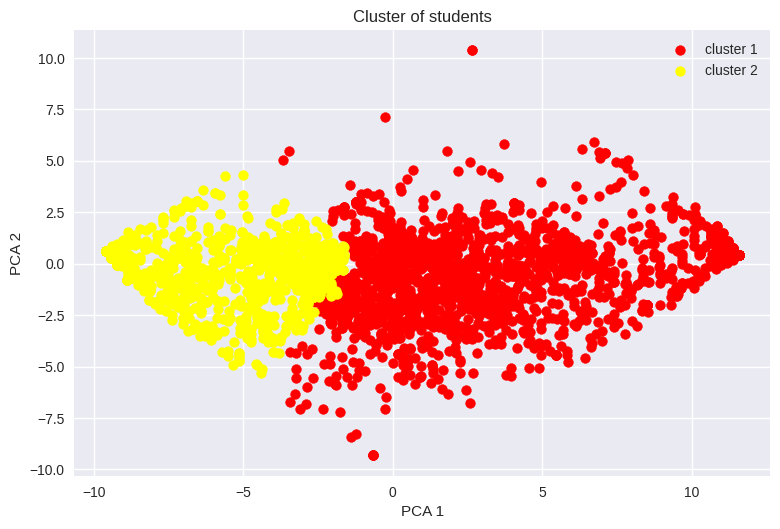

In [40]:
plt.scatter(X_pca[y==0, 0], X_pca[y==0, 1], s=50, c='red', label='cluster 1')
plt.scatter(X_pca[y==1, 0], X_pca[y==1, 1], s=50, c='yellow', label='cluster 2')
plt.title('Cluster of students')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

In [41]:
Counter(y)

Counter({0: 3502, 1: 2318})